In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
from pydataset import data
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

df = pd.read_csv('C:\\Users\\mou95504\\Desktop\\code\\Advertising.csv')
df = df.drop(columns = 'Unnamed: 0')
print(df)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [95]:
# TV, Radio, and Newspaper 86%
# X = df.iloc[:, :-1]

# TV and Radio 86%
# X = df.iloc[:, [0, 1]]

# TV and Newspaper 72%
# X = df.iloc[:, [0, 2]]

# Radio and Newspaper 21%
# X = df.iloc[:, [1, 2]]

# TV 67%
X = df.iloc[:, 0]

# Radio 22%
# X = df.iloc[:, 1]

# Newspaper -2%
# X = df.iloc[:, 2]

# Sales
y = df.iloc[:, 3]
X

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

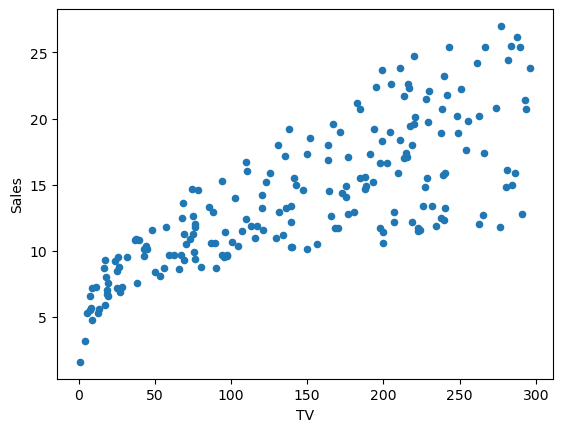

In [96]:
df.plot(kind = 'scatter', x = 'TV', y = 'Sales')
plt.show()

In [97]:
# Linear regression gives accuracy of 67% (Sales VS TV)

In [98]:
# Trying to fit a non-linear polynomial regression to improve the accuracy

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [99]:
y_test.shape

(40,)

In [100]:
X_train= X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

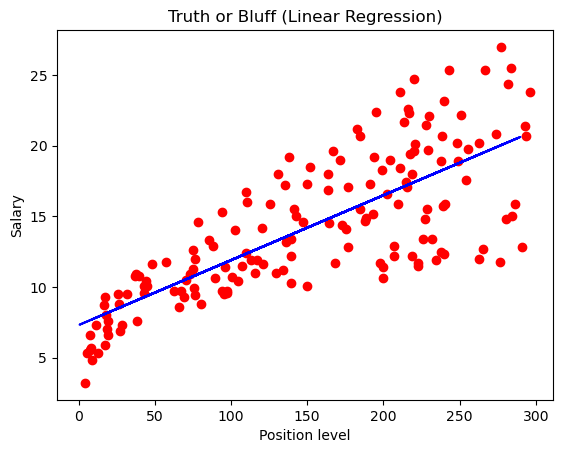

In [101]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_test, lin_reg.predict(X_test), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return

viz_linear()

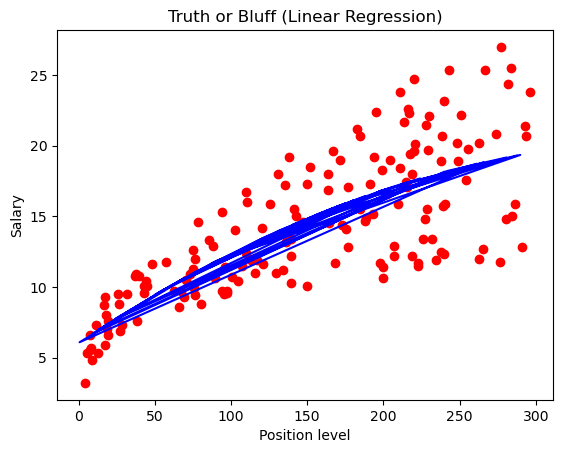

In [102]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_test, pol_reg.predict(poly_reg.fit_transform(X_test)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return

viz_polymonial()

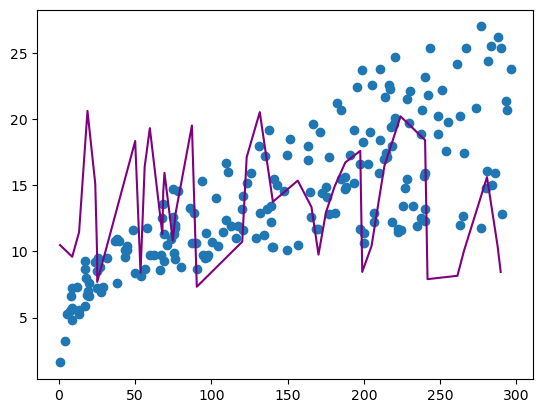

In [159]:
import matplotlib.pyplot as plt
import numpy as np

#define predictor and response variables
# x = np.array([2, 3, 4, 5, 6, 7, 7, 8, 9, 11, 12])
x = df.iloc[:, 0]
# y = np.array([18, 16, 15, 17, 20, 23, 25, 28, 31, 30, 29])
y = df.iloc[:, 3]

#create scatterplot to visualize relationship between x and y
# plt.scatter(x, y)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#specify degree of 3 for polynomial regression model
#include bias=False means don't force y-intercept to equal zero
poly = PolynomialFeatures(degree=1, include_bias=False)

#reshape data to work properly with sklearn
# poly_features = poly.fit_transform(x.values.reshape(-1, 1))
poly_features = poly.fit_transform(X_train)

#fit polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)

#display model coefficients
# print(poly_reg_model.intercept_, poly_reg_model.coef_)

#use model to make predictions on response variable
# test_x = np.linspace(start = 0, stop = 280, num=200)
# poly_test_x = poly.fit_transform(test_x.reshape(-1, 1))
sorted_test_X = sorted(X_test)
# poly_test_features = poly.fit_transform(sorted_test_X)
poly_test_features = poly.fit_transform(X_test)
y_predicted = poly_reg_model.predict(poly_test_features)

#create scatterplot of x vs. y
plt.scatter(X, y)

#add line to show fitted polynomial regression model
plt.plot(sorted(X_test), y_predicted, color='purple')

In [133]:
# np.sort(y_predicted).shape

In [134]:
# sorted_test_X.shape

In [135]:
# plt.scatter(sorted(X_test),np.sort(y_predicted))

In [136]:
# X_test

In [137]:
# sorted(X_test)

In [140]:
# degree 2
from sklearn.metrics import r2_score

score=r2_score(y_test,y_predicted)
score

0.6604481473780928

In [142]:
# degree 1
from sklearn.metrics import r2_score

score=r2_score(y_test,y_predicted)
score

0.6763151577939721

In [144]:
# degree 3
from sklearn.metrics import r2_score

score=r2_score(y_test,y_predicted)
score

0.6671517453887483

In [146]:
# degree 4
from sklearn.metrics import r2_score

score=r2_score(y_test,y_predicted)
score

0.6697561107113819

In [148]:
# degree 5
from sklearn.metrics import r2_score

score=r2_score(y_test,y_predicted)
score

0.678976914179281

In [150]:
# degree 6
from sklearn.metrics import r2_score

score=r2_score(y_test,y_predicted)
score

0.672686780540199

In [152]:
# degree 7
from sklearn.metrics import r2_score

score=r2_score(y_test,y_predicted)
score

0.6663986161699688

In [154]:
# degree 8
from sklearn.metrics import r2_score

score=r2_score(y_test,y_predicted)
score

0.6609480253240565

In [156]:
# degree 9
from sklearn.metrics import r2_score

score=r2_score(y_test,y_predicted)
score

0.6397654140276725

In [158]:
# degree 10
from sklearn.metrics import r2_score

score=r2_score(y_test,y_predicted)
score

0.5760784856101846